# 1. Data Extraction


In [1]:
#importing libraries
import pandas as pd




In [2]:
# Load the dataset and we use encoding='latin-1' because to avoid UnicodeDecodeError
data = pd.read_csv('spam.csv', encoding='latin-1')

Now that the data is loaded, let's take a look at the first few rows to make sure everything is in order.

In [3]:
# View the top 5 rows
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#check the size of the dataset (number of rows, number of columns)
data.shape

(5572, 5)

# 2. Data Cleaning


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Drop irrelevant columns
data = data[['v1', 'v2']]  # v1 = label, v2 = message

# Rename columns for clarity
data.columns = ['Label', 'Message']

# Check and remove null values
data.isnull().sum()
data = data.dropna()

# Remove duplicates
data = data.drop_duplicates()


In [7]:
data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.shape

(5169, 2)

# 3. Data Analysis

In [9]:
# Count labels
data['Label'].value_counts()



Label
ham     4516
spam     653
Name: count, dtype: int64

In [10]:
# Create new features

# Create a new column 'num_characters' to store the total number of characters in each message
# The len() function returns the number of characters in the string
data['num_characters'] = data['Message'].apply(len)

# Create a new column 'num_words' to store the total number of words in each message
# We use split() to divide the message into a list of words, and then count the length of that list
data['num_words'] = data['Message'].apply(lambda x: len(x.split()))

# Create a new column 'num_sentences' to store the number of sentences in each message
# nltk.sent_tokenize() splits the message into sentences using NLP rules
# Then we count the number of sentences using len()
import nltk
nltk.download('punkt')  # Download punkt tokenizer once

#data['num_sentences'] = data['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

data['num_sentences'] = data['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/meghanarendrasimha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
data.head()

,Label,Message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,ham,U dun say so early hor... U c already then say...,49,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1


# 4.Text Preprocessing

In [12]:
import nltk
from nltk.corpus import stopwords # to remove common words
from nltk.stem.porter import PorterStemmer  # for stemming: reducing words to their base form
import string # for removing punctuation marks

# Initialize the stemmer
ps = PorterStemmer()

#function to perform all the preprocessing steps on text data
def transform_text(text):
    text = text.lower()                            # convert to lowercase
    text = nltk.word_tokenize(text)                # Split the text  into words
    text = [word for word in text if word.isalnum()]  # remove special characters
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]  # remove stopwords and punctuation
    text = [ps.stem(word) for word in text]        # stemming
    return " ".join(text)                          # Join the cleaned words back into a single string

# Apply to all messages
data['transformed_message'] = data['Message'].apply(transform_text)


In [13]:
data.head()


,Label,Message,num_characters,num_words,num_sentences,transformed_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [14]:
# Import two text vectorization tools from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Count Vectorizer: Simple bag-of-words approach
# Create an instance of CountVectorizer
# This will convert each message into a vector of word counts
cv = CountVectorizer()

# Apply CountVectorizer on the preprocessed text column
# fit_transform() does two things:
#   - Builds a vocabulary of all words in the corpus
#   - Transforms each message into a numeric array based on word counts
X_bow = cv.fit_transform(data['transformed_message']).toarray()


# TF-IDF Vectorizer: Better for weighting important words
# Create a TfidfVectorizer instance
# max_features=3000 limits the number of unique words to 3000
tfidf = TfidfVectorizer(max_features=3000)

# Apply TF-IDF on the same preprocessed text
# This method gives higher weight to important, rare words and lower weight to frequent ones
X = tfidf.fit_transform(data['transformed_message']).toarray()


# 5. Comparing differnt models based on Accuracy,Precision,Recall and F1 scores

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare models to compare
# Define models to compare
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}
# Prepare labels
y = data['Label'].map({'ham': 0, 'spam': 1}).values

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# List to store comparison results
comparison_results = []

In [17]:
# Loop through each model in the dictionary "models"
for name, clf in models.items():
    
    # Train the current model on the training data
    clf.fit(X_train, y_train)
    
    # Use the trained model to predict labels for the test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy: proportion of correct predictions
    acc = accuracy_score(y_test, y_pred)
    
    # Calculate precision: of all predicted spam, how many were actually spam
    precision = precision_score(y_test, y_pred)
    
    # Calculate recall: of all actual spam messages, how many did we correctly identify
    recall = recall_score(y_test, y_pred)
    
    # Calculate F1-score: harmonic mean of precision and recall
    f1 = f1_score(y_test, y_pred)
    
    # Store the model name and its performance metrics in a dictionary,
    # then add it to the comparison_results list
    comparison_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })


/Users/meghanarendrasimha/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/meghanarendrasimha/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/meghanarendrasimha/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/meghanarendrasimha/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/meghanarendrasimha/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/meghanarendrasimha/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/megha

In [18]:
# Convert to DataFrame for a table
results_df = pd.DataFrame(comparison_results).sort_values(by="Accuracy", ascending=False)
print(results_df)

# Identify best model
best_model_name = results_df.iloc[0]["Model"]
print("\nBest Model:", best_model_name, 
      "with Accuracy:", results_df.iloc[0]["Accuracy"])

                     Model  Accuracy  Precision    Recall  F1-score
2               Linear SVM  0.980658   0.977099  0.882759  0.927536
0  Multinomial Naive Bayes  0.972921   0.991597  0.813793  0.893939
3            Random Forest  0.969052   0.991304  0.786207  0.876923
1      Logistic Regression  0.958414   0.947368  0.744828  0.833977
4            Decision Tree  0.948743   0.806667  0.834483  0.820339
5                      KNN  0.910058   1.000000  0.358621  0.527919

Best Model: Linear SVM with Accuracy: 0.9806576402321083


In [ ]:
# 1. New messages (outside dataset)
new_messages = [
    "Congratulations! You have won a free iPhone. Click here to claim now.",
    "Hey, are we still meeting for lunch today?",
    "Urgent! Your account has been suspended. Verify now to avoid penalties.",
    "Don't forget to submit the assignment by 5 PM today.",
    "Win a $500 gift card by clicking this link!"
]

# 2. True labels for the new messages
# 0 = Ham, 1 = Spam
true_labels = [1, 0, 1, 0, 1]  # manually labeled

# 3. Preprocess messages
new_messages_transformed = [transform_text(msg) for msg in new_messages]

# 4. Vectorize using trained TF-IDF
new_messages_vector = tfidf.transform(new_messages_transformed).toarray()

# 5. Predict with all models and evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, clf in models.items():
    pred_labels = clf.predict(new_messages_vector)
    
    # Convert numeric predictions to readable labels
    pred_labels_text = ["Spam" if x == 1 else "Ham" for x in pred_labels]
    
    # Calculate metrics
    acc = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels)
    recall = recall_score(true_labels, pred_labels)
    f1 = f1_score(true_labels, pred_labels)
    
    print(f"\n{name} Predictions: {pred_labels_text}")
    print(f"{name} Metrics: Accuracy={acc:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}")



Multinomial Naive Bayes Predictions: ['Spam', 'Ham', 'Ham', 'Ham', 'Spam']
Multinomial Naive Bayes Metrics: Accuracy=0.80, Precision=1.00, Recall=0.67, F1=0.80

Logistic Regression Predictions: ['Spam', 'Ham', 'Ham', 'Ham', 'Ham']
Logistic Regression Metrics: Accuracy=0.60, Precision=1.00, Recall=0.33, F1=0.50

Linear SVM Predictions: ['Spam', 'Ham', 'Ham', 'Ham', 'Spam']
Linear SVM Metrics: Accuracy=0.80, Precision=1.00, Recall=0.67, F1=0.80

Random Forest Predictions: ['Spam', 'Ham', 'Ham', 'Ham', 'Ham']
Random Forest Metrics: Accuracy=0.60, Precision=1.00, Recall=0.33, F1=0.50

Decision Tree Predictions: ['Spam', 'Ham', 'Ham', 'Ham', 'Ham']
Decision Tree Metrics: Accuracy=0.60, Precision=1.00, Recall=0.33, F1=0.50

KNN Predictions: ['Ham', 'Ham', 'Ham', 'Ham', 'Ham']
KNN Metrics: Accuracy=0.40, Precision=0.00, Recall=0.00, F1=0.00


/Users/meghanarendrasimha/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/meghanarendrasimha/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/meghanarendrasimha/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/meghanarendrasimha/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


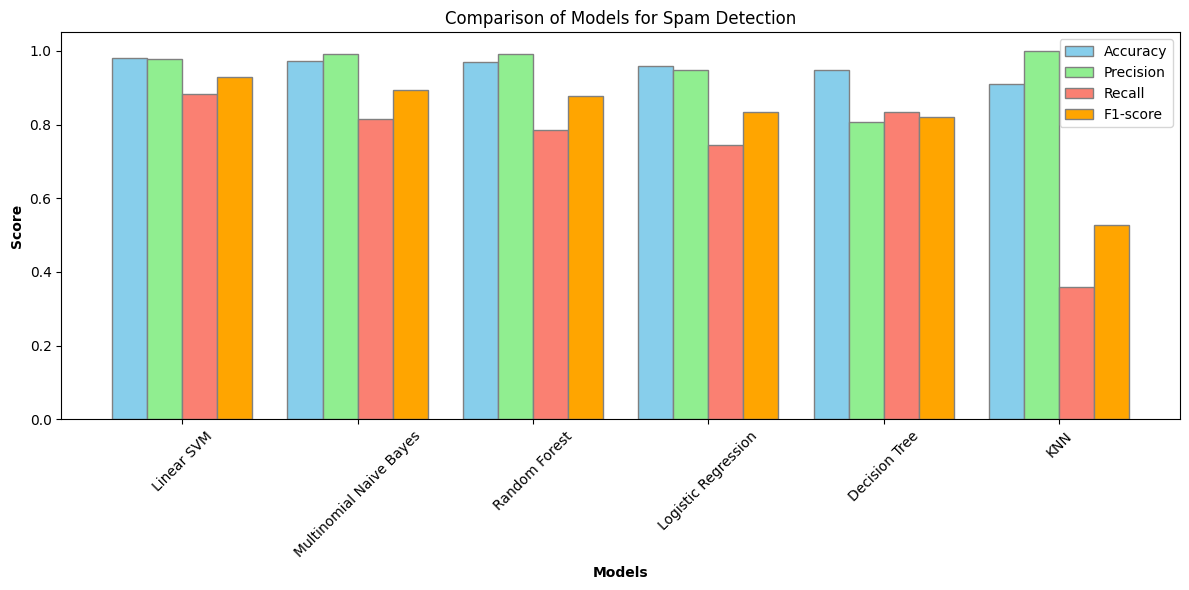

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Set metrics and models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
models_list = results_df['Model'].values

# Bar width and positions
bar_width = 0.2
r1 = np.arange(len(models_list))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]
r4 = [x + bar_width*3 for x in r1]

# Plot bars
plt.figure(figsize=(12,6))
plt.bar(r1, results_df['Accuracy'], color='skyblue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, results_df['Precision'], color='lightgreen', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, results_df['Recall'], color='salmon', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, results_df['F1-score'], color='orange', width=bar_width, edgecolor='grey', label='F1-score')

# Labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(models_list))], models_list, rotation=45)
plt.title('Comparison of Models for Spam Detection')
plt.ylim(0,1.05)
plt.legend()
plt.tight_layout()
plt.show()



Summary of Model Comparison:

1. Models evaluated:
   - Multinomial Naive Bayes
   - Logistic Regression
   - Linear SVM
   - Random Forest
   - Decision Tree
   - K-Nearest Neighbors (KNN)

2. Evaluation metrics on the test set:
   - Linear SVM achieved the **highest accuracy (0.981)**.
   - Multinomial Naive Bayes had slightly lower accuracy (0.973) but very high precision (0.992).
   - Random Forest and Logistic Regression were close, but recall was lower for detecting spam.
   - Decision Tree and KNN performed worse overall, with KNN showing very low recall.

3. Why Linear SVM was chosen over Naive Bayes:
   - Naive Bayes is usually a **strong baseline for spam detection** because it works well with text features like TF-IDF and is fast to train.
   - In our dataset, **Linear SVM outperformed Naive Bayes** in accuracy (0.981 vs 0.973) while maintaining a high F1-score (0.928), making it the best overall model for balanced performance.

4. Conclusion:
   - **Linear SVM is selected as the best model** based on highest accuracy and balanced precision-recall performance.

5. Next Step:
   - Proceed to **train the final Linear SVM model** on the entire dataset (all available messages) to maximize learning.
   - This trained model will be used for real-time spam prediction.

